# **Evaluación de la conectividad ecológica en el corregimiento de Santa Elena, Antioquia**

**Autor: Yina Sofía Racinez Jaramillo**

*yracinez@unal.edu.co*

*Universidad Nacional de Colombia*
*Facultad de Minas*
*Posgrado en Aprovechamiento de Recursos Hidráulicos*

*Código creado como ejercicio académico para el curso de Análisis Geoespacial*

[Enlace de GitHub](https://github.com/SofiaRacinez/Analisis_Geoespacial)



## **Resumen**
Este estudio se centró en la evaluación de la conectividad ecológica en el corregimiento de Santa Elena, Antioquia, con el objetivo de comprender los patrones espaciales de fragmentación del paisaje. Se utilizó un enfoque basado en datos y análisis geoespaciales y técnicas de Sistemas de Información Geográfica (SIG) para analizar la conectividad y obtener las rutas de conectividad ecológica para el corregimiento.
Los hallazgos revelaron que la región de Santa Elena enfrenta una alta fragmentación del paisaje debido a la expansión urbana, la actividad agrícola y la infraestructura vial. Esta fragmentación ha resultado en la pérdida y separación de hábitats naturales, lo que plantea desafíos para la integridad ecológica y la funcionalidad de los ecosistemas.
Por otro lado, se identificaron 70 corredores ecológicos que actúan como enlaces cruciales entre áreas naturales fragmentadas, permitiendo el flujo genético y el movimiento de especies. Estos corredores son vitales para la viabilidad de las poblaciones y el mantenimiento de los procesos ecológicos. Por lo tanto, es fundamental proteger y conservar estos corredores existentes, así como establecer nuevos enlaces para conectar áreas fragmentadas.


## **Introducción**

La creciente fragmentación del paisaje debido a la expansión urbana y la transformación de hábitats naturales plantea desafíos significativos para la conservación de la biodiversidad y el mantenimiento de los procesos ecológicos. En particular, la conectividad ecológica ha surgido como un concepto clave en la planificación y gestión de paisajes, ya que desempeña un papel fundamental en la viabilidad a largo plazo de las poblaciones y en la restauración de los ecosistemas degradados.
En el contexto del corregimiento de Santa Elena, Antioquia, cuya superficie de bosques se encuentran fuertemente perturbados y con un alto grado de de desconexión entre ellos, en particular por encontrarse embebidos en una matriz de tierras urbanizadas, tierras dedicadas a a diferentes actividades de producción silvícola y agropecuaria, y tierras de reciente suburbanización (Colorado et al., 2017). No obstante, los bosques de este corregimiento cumplen funciones importantes en términos de recreación para la población metropolitana, así como para la regulación hídrica de áreas abastecedoras de acueductos de una población rural significativa (Alcaldía de Medellín, 2014). Es por ello que la evaluación de la conectividad ecológica se convierte en una prioridad para garantizar la conservación de su patrimonio natural y la prestación de bienes y servicios ecosistémicos.
El objetivo de este estudio es llevar a cabo una evaluación de la conectividad ecológica en el corregimiento de Santa Elena, utilizando  herramientas de ecología del paisaje y análisis espaciales, a partir de las cuales se pueden identificar los corredores de conectividad ecológica, que a su vez permiten evaluar la restricciones al movimiento de las especies y determinar las áreas prioritarias para la restauración y conservación.
Con este estudio se pretende proporcionar información para el diseño de estrategias de conservación y restauración que promuevan la conectividad ecológica en  el corregimiento de Santa Elena. Los resultados obtenidos ayudarán a orientar la toma de decisiones en la planificación territorial, la gestión de áreas protegidas y la implementación de medidas de manejo del paisaje que contribuyan a mantener los procesos ecológicos y preservar la biodiversidad en la región.

## **Materiales y métodos**

### **Insumos**

1. **Coberturas de la tierra:** Corresponde con la clasificación realizada por Área Metropolitana del Valle de Aburrá -AMVA- escala 1:25.000
2. **Vías:** Obtenidas a partir de la cartografía base del Área Metropolitana del Valle de Aburrá, y complementadas a partir de imágenes satelitales (Google)
3. **Drenajes:** Obtenidas a partir de la cartografía del Plan de Ordenación y Manejo de la Cuenca Hidrográfica del río Aburrá-POMCA del Área Metropolitana del Valle de Aburrá


### **Configuración de ambiente de trabajo**

Se realizó la configuración del ambiente de trabajo para análisis geoespacial mediante la instalación del Paquete [Geospatial](https://geospatial.gishub.org/) de python, desarrollado por [Qiusheng Wu](https://scholar.google.com/citations?user=vmml4_0AAAAJ&hl=es&oi=ao), e instalado siguiendo los pasos dados por el autor en el siguiente video, [clic aquí](https://www.youtube.com/watch?v=N7qMP2Z8gks).

También se instaló la librería [PyLandStats](https://pylandstats.readthedocs.io/en/latest/) para estimar métricas de paisaje y finalmente se importaron las librerías necesarias para el desarrollo del ejercicio académico

In [40]:
# importar las librerias para el desarrollo del estudio
import os # libreria para manejo de rutas de archivos
os.environ['USE_PYGEOS'] = '0' # para evitar advertencia pygeos deprecate y usar shapely por defecto
import geopandas as gpd # libreria para manejo de datos vectoriales
import pandas as pd
import fiona # libreria para manejo del .gpkg
import matplotlib.pyplot as plt # libreria para graficas
import seaborn as sns # libreria para graficas
import pylandstats as pls #para metricas de paisaje


# definir estilo para graficas
plt.style.use('seaborn')

### **Lectura de datos**

#### **Preparación para lectura de datos**

In [41]:
# nombre del geopackage con datos de entrada
nombre_gpkg_entrada = 'insumos_base.gpkg'

# ruta base para unir luego con gpkg, img y raster
ruta_base = os.getcwd()

# ruta a geopackage de datos de entrada
gpkg_entrada = os.path.join(ruta_base,nombre_gpkg_entrada)


#### **Lectura de datos**

In [42]:
# Se listan las capas del gpkg
capas = fiona.listlayers(gpkg_entrada)
capas


['cob_amva_25k',
 'vias_pg',
 'limites_corregimiento',
 'sectores_santa_elena',
 'drenajes_ln']

In [43]:
# Cargar capas del gpkg
gdf_cob = gpd.read_file(gpkg_entrada, layer='cob_amva_25k') # Lee la capa de coberturas
gdf_vias = gpd.read_file(gpkg_entrada, layer='vias_pg') # Lee la capa de vias
gdf_sectores = gpd.read_file(gpkg_entrada, layer='sectores_santa_elena') # Lee la capa de sectores de Santa Elena
gdf_drenajes = gpd.read_file(gpkg_entrada, layer='drenajes_ln') # Lee la capa de drenajes
gdf_limite = gpd.read_file(gpkg_entrada, layer='limites_corregimiento') # Lee la capa de limites del corregimiento


In [44]:
# obtener nombre de columnas de la capa sectores
print(gdf_sectores.columns)

# crear columna de area en hectareas
gdf_sectores['area_ha'] = gdf_sectores.area/10000

Index(['CODIGO', 'NOMBRE', 'Area_km2', 'geometry'], dtype='object')


### **Área de estudio**

Santa Elena es uno de los cinco (5) corregimientos que tiene el territorio rural de Medellín. Abarca un total de 74,15 km2. Se localiza en el oriente de la ciudad, Santa Elena sirve de límite natural entre los Valles de Aburrá, que tiene al río Medellín como eje estructurante del paisaje, y San Nicolás, por donde discurre el río Negro hacia el Valle del Magdalena, principal río del país. El corregimiento está divido político-administrativamente en 11 veredas, su población aproximada es de 18.000 personas, y las principales actividades económicas desarrolladas son agropecuarias, silvícolas, y de servicios asociados a la suburbanización y el turismo (Grupo HTM-Municipio de Medellín, 2009).
El territorio se encuentra distribuido en once sectores correspondientes a: Barro Blanco, El Cerro, El Llano, El Plan, El Placer, Las Palmas, Mazo, Media Luna, Piedra Gorda, Piedras Blancas-Matasano y Santa Elena sector central.
El sector Piedras Blancas-Matasano ocupa el 30% del área total del corregimiento, seguido de Las Palmas con un 21,44%, Media Luna con el 12,73%, El Pan con 8,33% y Mazo con 6,76%, el resto de sectores abarcan menos del 5% del total del área, tal y como se muestra a continuación:

In [45]:
# se agrega columna con proporcion de area por sector y se muestra en tabla
gdf_sectores["prop_area"] = round((gdf_sectores.area_ha/gdf_sectores.area_ha.sum())*100,2)
gdf_sectores[['NOMBRE', 'prop_area']].sort_values('prop_area', ascending=False)


NOMBRE  prop_area
8   Piedras Blancas - Matasano      30.00
2                   Las Palmas      21.44
0                   Media Luna      12.73
4                       El Pan       8.33
7                         Mazo       6.76
9   Santa Elena Sector Central       4.36
6                 Barro Blanco       4.21
1                 Piedra Gorda       4.07
3                  El Llano SE       2.86
10                   El Placer       2.76
5                     El Cerro       2.48

C:\Users\Sofi\AppData\Local\Temp\ipykernel_5996\1262794506.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


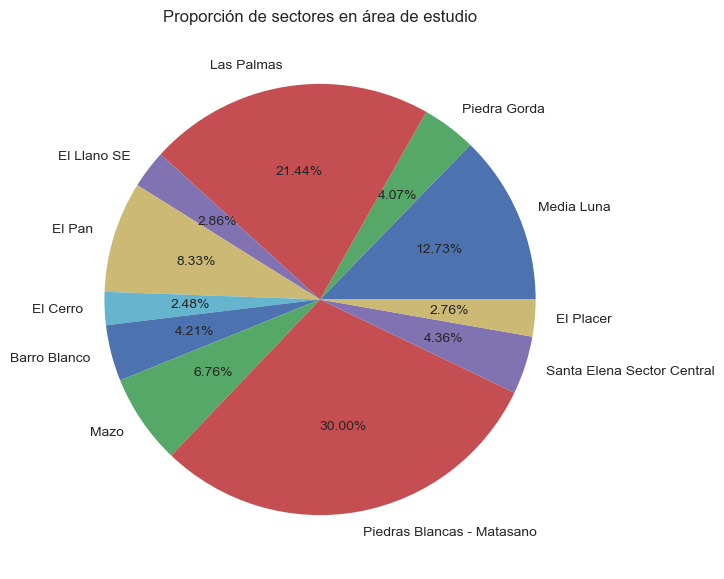

In [46]:
#grafica de pie por sector
fig, ax = plt.subplots(figsize=(7,7))

# se grafica en ax
ax.pie(gdf_sectores.prop_area,
       labels=list(gdf_sectores.NOMBRE),
       autopct='%1.2f%%')
       
ax.set_title('Proporción de sectores en área de estudio') # se agrega titulo a grafica

# muestra el pie
fig.show()

In [47]:
# para mostrar el area de estudio
gdf_sectores.explore(
     column="prop_area", # coropleta basada en columna "prop_area"
     tooltip=['NOMBRE', 'prop_area'], # muestra "NOMBRE" y proporcion de area en cajetín, cuando se pasa el cursor
     popup=True, # mostrar todos los valores de columna con un clic sobre el polígono
     tiles="CartoDB positron", # usa "CartoDB positron" de mapa base
     cmap="Blues", # usa "Accent" matplotlib para colores
     style_kwds=dict(color="black") # usa borde de polígonos negro
    )

En términos de coberturas, el corregimiento de Santa Elena se caracteriza por estar dominado por bosque plantado que ocupa el 30,41 % del total de su área, seguido de las construcciones con el 21,68 %, el rastrojo alto con 18,56 %, el pasto manejado con 11,96 %, el resto de coberturas ocupan menos del 10 % del total del área del corregimiento.  
A continuación, en la figura se presenta la distribución espacial de las coberturas de la tierra para el corregimiento de Santa Elena.

In [48]:
#obtener nombres de columnas de la capa de coberturas
gdf_cob.columns

Index(['nivel_3', 'Area_ha', 'area_km2', 'cob_equivalente', 'geometry'], dtype='object')

In [49]:
gdf_cob.explore(
    column='cob_equivalente', # coropleta basa en columna del nombre de la cobertura
    tooltip=['cob_equivalente', 'Area_ha'], # muestra las coberturas y area en el cajetin cuando se pase el cursor
    popup=True, # muestra todos los valores de la columna con un clic sobre el polígono
    tiles='CartoDB positron', # usa cartodb positron de mapa base
    cmap = ['#38a800','#006154','#ffc8c8','#cdaa66','#91c99c','#f2ed00','#ffff73','#bac99c','#d9e582','#69cd66','#c2cce0'], # asigna colores de mapa en orden alfabetico
    style_kwds=dict(color='black') # usa borde de polígono negro
)

Por otro lado, en la siguiente tabla se muestra el área en hectáreas y en porcentaje de cada una de las categorías de coberturas presentes en el corregimiento.

In [50]:
# generar dataframe con valores de area: minimo, maximo y suma y cantidad de poligonos por cobertura
cob_res_area = gdf_cob.groupby('cob_equivalente').agg(num_poli=('cob_equivalente','count'),  # numero de poligonos por cobertura
                                              area_ha_min=('Area_ha','min'), # area de poligono mas pequeno por cobertura 
                                              area_ha_max=('Area_ha','max'), # area de poligono mas grande por cobertura 
                                              area_ha_tot=('Area_ha','sum')) # area total por cobertura 

cob_res_area['area_porcent'] =  round(cob_res_area.area_ha_tot/cob_res_area.area_ha_tot.sum()*100,2) # porcentaje de area por cobertura 

# muestra tabla generada con anterioridad
cob_res_area

num_poli   area_ha_min  area_ha_max  \
cob_equivalente                                                             
Bosque natural fragmentado                   4  4.069643e-02   125.464992   
Bosque plantado                             24  5.184306e-03  1126.118101   
Construcciones                              79  1.067845e-06   363.876179   
Cultivo transitorio                          8  6.230543e-07    47.595071   
Cultivo transitorio - Pasto manejado         3  3.196269e+01    89.382673   
Grama                                        4  5.158884e-04     0.699386   
Pasto manejado                              19  1.136303e-02   258.805521   
Pasto manejado - Cultivo transitorio         8  1.459699e+01    95.600221   
Pasto natural                                7  2.227007e-02    63.770656   
Rastrojo alto                               36  1.183699e-03   266.205561   
Suelo desnudo                                2  1.883378e+01    27.671330   

                                      area_ha_tot  area_porcent  
cob_equivalente                                                  
Bosque natural fragmentado             281.475879          3.80  
Bosque plantado                       2255.113382         30.41  
Construcciones                        1607.919391         21.68  
Cultivo transitorio                     54.315728          0.73  
Cultivo transitorio - Pasto manejado   155.844165          2.10  
Grama                                    1.384224          0.02  
Pasto manejado                         886.929691         11.96  
Pasto manejado - Cultivo transitorio   459.071261          6.19  
Pasto natural                          290.281644          3.91  
Rastrojo alto                         1376.400409         18.56  
Suelo desnudo                           46.505114          0.63

Para realizar una descripción general de áreas naturales a partir de las cuales se configuran áreas núcleo, se categorizaron las coberturas en naturales y antropizadas; siendo el Bosque natural fragmetado y el rastrojo alto las que corresponden con coberturas naturales, las demás se tomaron como antropizadas.

In [51]:
# Condicion para llenar columna nueva con categoria Natural
condicion = gdf_cob['cob_equivalente'].isin(['Bosque natural fragmentado', 'Rastrojo alto'])

In [52]:
# Se crea campo categ_cob con palabra vacio
gdf_cob['categ_cob'] = 'vacio'

# Se reemplaza vacio por Natural o Antropica segun la condicion
gdf_cob['categ_cob'] = gdf_cob['categ_cob'].mask(condicion, 'Natural').mask(~condicion, 'Antropica')

# Muestra los datos de cinco registros al azar
gdf_cob.sample(5)

nivel_3       Area_ha  \
57   2.4.4. Mosaico de pastos con espacios naturales  3.417337e+01   
68      3.2.3. Vegetación secundaria o en transición  5.530670e+01   
125              2.4.2. Mosaico de pastos y cultivos  6.230543e-07   
122                            2.3.1. Pastos limpios  1.752177e-01   
56   2.4.4. Mosaico de pastos con espacios naturales  7.847557e+01   

         area_km2                       cob_equivalente  \
57   3.417337e-01  Pasto manejado - Cultivo transitorio   
68   5.530670e-01                         Rastrojo alto   
125  6.230543e-09                   Cultivo transitorio   
122  1.752177e-03                        Pasto manejado   
56   7.847557e-01  Pasto manejado - Cultivo transitorio   

                                              geometry  categ_cob  
57   MULTIPOLYGON (((4721640.842 2245751.108, 47216...  Antropica  
68   MULTIPOLYGON (((4721805.583 2251908.184, 47217...    Natural  
125  MULTIPOLYGON (((4722298.444 2243002.631, 47222...  Antropica  
122  MULTIPOLYGON (((4720033.325 2242083.500, 47200...  Antropica  
56   MULTIPOLYGON (((4723841.792 2242853.195, 47238...  Antropica

In [53]:
# resumen de area de poligonos
round(gdf_cob.Area_ha.describe(),2)

count     194.00
mean       38.22
std        96.29
min         0.00
25%         0.10
50%         4.90
75%        43.76
max      1126.12
Name: Area_ha, dtype: float64

En general los polígonos de coberturas presentan áreas menores 100 hectáreas, con un valor promedio de 38,22 hectáreas, el 50% de los datos se encuentra entre 0,10 y 43,76 hectáreas y existe un polígono con un área de 1.126,12 hectáreas. Aunque el área natural es poca, también se puede observar que la mayoría de polígonos tienen áreas menores a 100 hectáreas y siguen distribuciones similares a las del conjunto de datos general, lo que indica que la zona está altamente intervenida, bien sea por uso comercial como cultivos y plantaciones o por uso para vivienda.

C:\Users\Sofi\AppData\Local\Temp\ipykernel_5996\3412921827.py:56: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


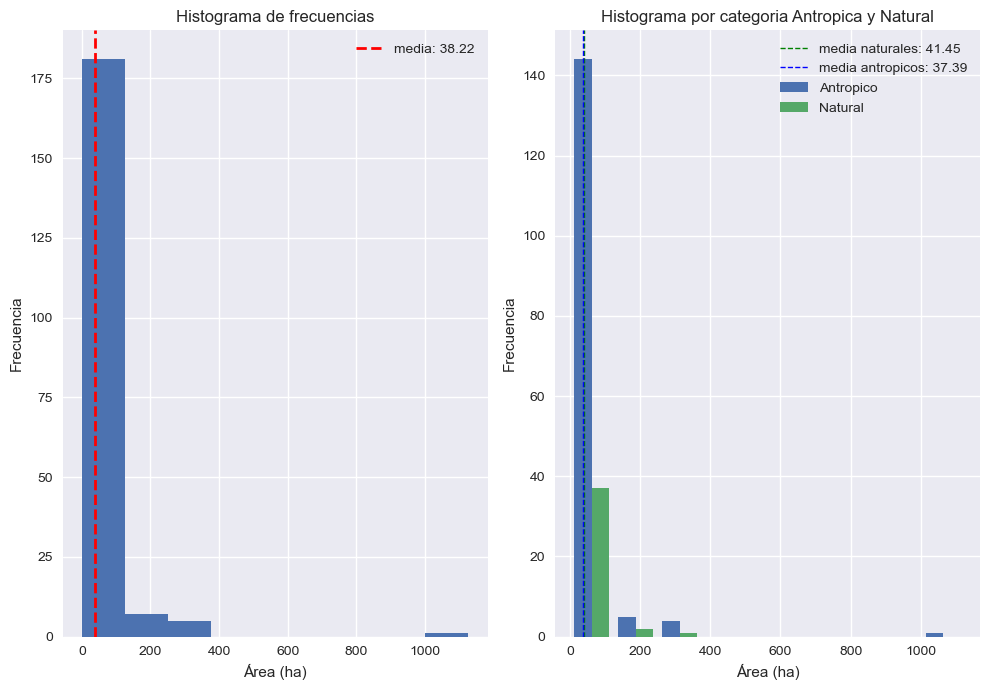

In [54]:
# graficar histograma por area de poligonos juntos y por cobertura
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

ax1.hist(
    gdf_cob.Area_ha,
    bins='sturges' # numero de agrupaciones se puede poner un numero o un metodo: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'
    )

# agregar linea punteada con valor medio de area de poligonos
ax1.axvline(
    x=gdf_cob.Area_ha.mean(),
    color = 'red', #color de linea
    linestyle='dashed', #estilo de linea
    linewidth= 2, # ancho de linea
    label='media: {:5.2f}'.format(gdf_cob.Area_ha.mean()) # label para linea punteada
)

ax1.set_xlabel('Área (ha)') # nombre eje x
ax1.set_ylabel('Frecuencia') # nombre eje y
ax1.set_title('Histograma de frecuencias')
ax1.legend(loc=0)



# graficar histograma por area de poligonos y categoria natural o antropica
ax2.hist(
    [gdf_cob[gdf_cob['categ_cob']=='Antropica'].Area_ha, gdf_cob[gdf_cob['categ_cob']=='Natural'].Area_ha], # datos para histograma, van entre corchetes para graficar dos variables
    bins='sturges', # numero de agrupaciones se puede poner un numero o un metodo: 'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'
    label=['Antropico', 'Natural'] # label para barras de histograma, van en el mismo orden de las variables a graficar
    )

# agregar linea con valor medio de area de poligonos natural
ax2.axvline(
    x=gdf_cob[gdf_cob['categ_cob']=='Natural'].Area_ha.mean(), # valor de linea punteada
    color = 'green', # color de linea
    linestyle='dashed', # estilo de linea
    linewidth= 1, # ancho de linea
    label='media naturales: {:5.2f}'.format(gdf_cob[gdf_cob['categ_cob']=='Natural'].Area_ha.mean()) # label para leyenda
)

# agregar linea con valor medio de area de poligonos con actividad antropica
ax2.axvline(
    x=gdf_cob[gdf_cob['categ_cob']=='Antropica'].Area_ha.mean(), # valor de linea punteada
    color = 'blue', # color de linea
    linestyle='dashed', # estilo de linea
    linewidth= 1, # ancho de linea
    label='media antropicos: {:5.2f}'.format(gdf_cob[gdf_cob['categ_cob']=='Antropica'].Area_ha.mean()) # label para leyenda
)
ax2.set_xlabel('Área (ha)') # nombre del eje x
ax2.set_ylabel('Frecuencia') # nombre del eje y
ax2.set_title('Histograma por categoria Antropica y Natural')
ax2.legend() # activa la leyenda para que se muestre en la grafica

fig.tight_layout() # ajusta las graficas para que no se sobrepongan la de la izquida con la de la derecha

fig.show()

Para validar si el área natural se distribuye de forma uniforme en todos los sectores del corregimiento, se estimó el área natural por corregimiento y se normalizó con el área del mismo.

In [55]:
# Hacer interseccion entre coberturas y sectores
gdf_cob_sect1 = gdf_cob.overlay(gdf_sectores, how='intersection')

In [56]:
# hacer copia de gdf interseccion
gdf_cob_sect2 = gdf_cob_sect1.copy()

# separar poligonos
gdf_cob_sect2 = gdf_cob_sect2.explode(ignore_index=True)

# eliminar columnas area_km2, Area_km2 y Area_ha
gdf_cob_sect2 = gdf_cob_sect2.drop(columns=['area_km2', 'Area_km2', 'area_ha'])

In [57]:
# actualizar area en hectareas
gdf_cob_sect2['Area_ha']=gdf_cob_sect2.area/10000

# mostrar los primeros cinco registros
gdf_cob_sect2.head()

nivel_3    Area_ha cob_equivalente  categ_cob  \
0     1.1.1. Tejido urbano continuo   0.000003  Construcciones  Antropica   
1  1.1.2. Tejido urbano discontinuo   0.010675  Construcciones  Antropica   
2             2.3.1. Pastos limpios  36.928303  Pasto manejado  Antropica   
3             2.3.1. Pastos limpios   0.002773  Pasto manejado  Antropica   
4             2.3.1. Pastos limpios   0.016777  Pasto manejado  Antropica   

  CODIGO       NOMBRE  prop_area  \
0     90  El Llano SE       2.86   
1     90  El Llano SE       2.86   
2     90  El Llano SE       2.86   
3     90  El Llano SE       2.86   
4     90  El Llano SE       2.86   

                                            geometry  
0  POLYGON ((4723727.308 2244717.410, 4723727.011...  
1  POLYGON ((4724037.665 2243939.152, 4724027.420...  
2  POLYGON ((4723830.627 2243151.455, 4723797.566...  
3  POLYGON ((4724209.415 2243334.665, 4724216.331...  
4  POLYGON ((4724042.813 2243341.236, 4724062.672...

In [58]:
# Estimar el area por sector y categoria Antropica o Natural
df = gdf_cob_sect2.pivot_table(
    index='NOMBRE',
    columns='categ_cob',
    values='Area_ha',
    aggfunc='sum'
)

# Renombrar columnas
df=df.rename(index=str, columns={"Antropica":"Antropica_ha",
                        "Natural":"Natural_ha"})

# Obtener proporcion de area por categoria Antropica o Natural
df_2= round(df.div(df.sum(1,numeric_only=True),axis=0)*100, 2)

# Renombrar columnas
df_2=df_2.rename(index=str, columns={"Antropica_ha":"Antropica_prop",
                        "Natural_ha":"Natural_prop"})

# Unir areas y proporciones
df_3 = pd.concat([df,df_2],axis=1)


In [59]:
# Convertir indices en columnas
df_3 = df_3.reset_index()

# Hacer copia del gdf sectores
gdf_sectores_2 = gdf_sectores.copy()
gdf_sectores_2 = gdf_sectores_2.drop(columns=['Area_km2'])

# Unir atributos del df3 que tiene areas con gdf sectores 2
gdf_sectores_2 = gdf_sectores_2.merge(df_3, on='NOMBRE')

In [60]:
# Para mostrar la tabla de mayor a menor proporcion de area con cobertura natural
gdf_sectores_2.sort_values('Natural_prop', ascending=False)

CODIGO                      NOMBRE  \
4      90                      El Pan   
1      90                Piedra Gorda   
10     90                   El Placer   
7      90                        Mazo   
8      90  Piedras Blancas - Matasano   
2      90                  Las Palmas   
0      90                  Media Luna   
5      90                    El Cerro   
3      90                 El Llano SE   
9      90  Santa Elena Sector Central   
6      90                Barro Blanco   

                                             geometry      area_ha  prop_area  \
4   MULTIPOLYGON (((4722479.719 2242971.538, 47224...   617.727955       8.33   
1   MULTIPOLYGON (((4724402.163 2246891.858, 47243...   301.566935       4.07   
10  MULTIPOLYGON (((4724476.337 2245612.042, 47244...   204.347117       2.76   
7   MULTIPOLYGON (((4724668.157 2249538.570, 47247...   501.135344       6.76   
8   MULTIPOLYGON (((4725002.779 2249681.098, 47250...  2224.669035      30.00   
2   MULTIPOLYGON (((4720296.019 2242382.963, 47202...  1590.171749      21.44   
0   MULTIPOLYGON (((4721914.421 2249402.701, 47219...   944.227783      12.73   
5   MULTIPOLYGON (((4725035.128 2244293.242, 47250...   184.058342       2.48   
3   MULTIPOLYGON (((4722479.719 2242971.538, 47225...   211.913336       2.86   
9   MULTIPOLYGON (((4723199.042 2245378.807, 47232...   323.045832       4.36   
6   MULTIPOLYGON (((4725225.297 2249434.118, 47252...   312.377465       4.21   

    Antropica_ha  Natural_ha  Antropica_prop  Natural_prop  
4     389.427729  228.300225           63.04         36.96  
1     211.420296   90.146639           70.11         29.89  
10    146.529902   57.817215           71.71         28.29  
7     363.221696  137.913648           72.48         27.52  
8    1646.255420  578.413610           74.00         26.00  
2    1215.132549  375.039200           76.42         23.58  
0     814.059201  130.168583           86.21         13.79  
5     165.398720   18.659622           89.86         10.14  
3     192.902305   19.011031           91.03          8.97  
9     304.736145   18.309687           94.33          5.67  
6     308.280637    4.096828           98.69          1.31

In [61]:
#Se muestra el mapa de coropletas
gdf_sectores_2.explore(
    column="Natural_prop", # coropleta basa en columna del proporcion de area natural
    tooltip=['NOMBRE','Natural_prop'], # muestra las proporciones de coberturas con el nombre del sector en el cajetin, cuando se pase el cursor
    popup=True, # muestra todos los valores de la columna con un clic sobre el polígono
    tiles="CartoDB positron", # usa cartodb positron de mapa base
    cmap="Greens", # usa Accent de matplotlib para colores
    style_kwds=dict(color="black") # usa borde de polígono negro
)

Con base en los resultados, el sector El Pan es el que presenta mayor área de cobertura natural, ya que cerca del 37 % del total de su área está ocupada por esta categoría de cobertura, le sigue Piedra Gorda con el 29,89 %, El Placer con el 28,29 %, Mazo con el 27,52 % y Piedras Blancas-Matasano con el 26 %. El resto de los sectores presentan coberturas naturales en menos del 25 % del total de su área, es importante resaltar que los sectores de vereda localizados en el oriente del corregimiento de Santa Elena presentan los menores porcentajes de cobertura natural, lo que da cuenta de la intervención antrópica a la que está siendo sometido este territorio. 

### **Métodos**

Con el propósito de valuar la conectividad ecológica en el corregimiento de Santa Elena, se siguieron los pasos que se describen a continuación:
1. Definición de las métricas de paisaje estructural
2. Definición de los núcleos de conservación a conectar
3. Elaboración de mapas de fricción para el desplazamiento de las especies
4. Modelamiento de la red de conectividad ecológica


#### **Definición de las métricas de paisaje estructural**

Las métricas del paisaje cuantifican el patrón del paisaje únicamente dentro del límite establecido. En este trabajo se calcularon cinco métricas de paisaje, correspondientes a: 
* Índice de forma media (MSI): Calcula la complejidad de la forma media de los parches en comparación con una forma estándar, como sería la circunferencia en el entorno vectorial i el pixel en el entorno raster. La forma de un parche está caracterizada por la longitud de sus bordes. Se interpreta que, si los valores son iguales a 1, los patrones de forma son circulares y se incrementa al aumentar la irregularidad de la forma del parche (Britto, G. 2021). 
* Número de parches (NP): Conjunto de polígonos pertenecientes a una clase (Monedero & Gutiérrez, 2001). Se utiliza también como índice de heterogeneidad y como base para el cálculo de otras métricas.
* Área total: Extensión total del parche
* Área interior: Buffer interior del parche
* Distancia entre parches: Medida simple de aislamiento entre parches. La distancia al vecino más cercano se define utilizando la distancia euclidiana simple como la distancia más corta en línea recta entre el parche focal y su vecino más cercano de la misma clase, basado en la distancia entre los centroides de cada uno de los parches. 

#### **Definición de núcleos de conservación a conectar**

Según Colorado et al., (2017) la definición y selección de núcleos para la conservación es parte fundamental del diseño de redes de conectividad, ya que en estos núcleos es donde se considera que están presentes la mayoría de las comunidades, especies y demás recursos naturales de interés para la conservación. Por otro lado, Kattan (2002) señala que el área, borde y grado de aislamiento son los principales causantes de la extinción de especies en fragmentos de bosque, debido a esto, los criterios para la selección de los núcleos de conservación a conectar se basaron en las métricas definidas anteriormente, considerando que estas se relacionan estrechamente con la funcionalidad ecosistémica. 
Para esto se identificaron inicialmente los fragmentos de bosques natural fragmentado y rastrojo alto, además se tuvo en cuenta que, el área total de los fragmentos fuera mayor a 5,0 ha. Posteriormente se eligieron aquellos núcleos que tuvieran un área interior mayor a 1,0 ha. Así como lo mencionan Colorado at al., (2017) áreas de interior como la sugerida, permiten tener una mayor funcionalidad ecosistémica para poblaciones de fauna y flora con requerimientos de interior de bosque, así como el sostenimiento a largo plazo de procesos biológicos relevantes. 
Finalmente, se seleccionaron aquellos núcleos cuyo MSI mostraran formas redondeadas o casi redondeadas con algunos brazos de vegetación que facilitaran la conectividad con otros núcleos (Colorado et al.,2017). 

#### **Elaboración del mapa de fricción para el desplazamiento de las especies**

En este paso se construye un mapa de fricción, los cuales se relacionan con las limitaciones que la matriz del paisaje presenta para el desplazamiento de los individuos [1]. Para ello se realizó una modificación en las variables propuestas por Colorado et al., (2017), en el cual se evaluaron cuatro (4) criterios correspondientes a coberturas, distancia a vías, distancia a drenajes y áreas núcleo, tal y como se muestra a continuación:

![tabla](./img/criterios_mapa_friccion_.png)

El mapa de fricción se realizó mediante un Proceso de Análisis Jerárquico (AHP-Analitycal hierarchy process) para la toma de decisiones, desarrollado por Thomas L. Saaty (1980) [7].
En este proceso se consultó a  tres (3) profesionales: 1 biólogo flora, 1 ecólogo y 1 docente de ecología del paisaje. La ponderación de las variables se realizó con base en el análisis multicriterio (variable), teniendo en cuenta una matriz de doble entrada. Los profesionales realizaron la calificación con base en el aporte de los criterios a la restricción o fricción del movimiento de las especies en el corregimiento de Santa Elena, Antioquia; entendiendo que:


*   Si la variable fila prima sobre la variable columna la calificación es un número entero (1, 3, 5, 7 o 9)
*   Si la variable columna prima sobre la variable fila, la calificación es una fracción (1/1, 1/3, 1/5, 1/7 o 1/9)

A modo de ejemplo, se presenta la siguiente tabla:

![tabla](./img/ponderacion_variables.png)


Por otro lado, la escala numérica, su importancia y explicación se resenta a continuación:

![tabla](./img/escalas_ahp.png)

#### **Modelamiento de la red de conectividad ecológica**

Para generar la red de conectividad entre los núcleos de conservación definidos previamente, se utilizó el método de la ruta de menor costo para el desplazamiento. Para ello se utiliza un modelo costo-distancia, empleando funciones de Python en el software [Qgis v3.22](https://www.qgis.org/es/site/) y el complemento [Least Cost Path](https://github.com/Gooong/LeastCostPath) con las cuales se identifican las rutas de conectividad entre los centroides de los fragmentos (núcleos) sobre cada uno de los mapas de fricción definidos. Utilizando cada núcleo como punto de origen a conectar sobre la superficie de costos creadas se generan redes de conectividad desde los núcleos origen hacia los núcleos destinos por las rutas con menor dificultad para el desplazamiento. 
Lo anterior implica que la ruta diseñada corresponda con aquella que posee el menor valor acumulado de desplazamiento sobre la superficie de costos. Una vez obtenidas las rutas de conectividad, se cruzaron con la capa de coberturas de la tierra, previamente reclasificadas, para luego ser comparadas con los resultados obtenidos por Colorado et al., (2017). 

## **Resultados y discusión**

### **Definición de las métricas de paisaje estructural**

A continuación se presentan las métricas de paisaje estructural definidas.

In [62]:
# Se crea campo valor_clase con valor cero
gdf_cob['valor_clase'] = 0

# Se reemplaza 0 por 1 y lo demas por 2, se usa la misma condicion generada para clasificar Natural y Antropico
gdf_cob['valor_clase'] = gdf_cob['valor_clase'].mask(condicion, 1).mask(~condicion, 2)


In [63]:
# Muestra los datos de cinco registros al azar
gdf_cob.sample(5)

nivel_3     Area_ha  area_km2  \
76                     3.1.5. Plantación forestal   28.309638  0.283096   
129  3.2.3. Vegetación secundaria o en transición    0.102903  0.001029   
164                 1.1.1. Tejido urbano continuo    6.648449  0.066484   
54                     3.1.5. Plantación forestal  136.436861  1.364369   
137              1.1.2. Tejido urbano discontinuo    6.310863  0.063109   

     cob_equivalente                                           geometry  \
76   Bosque plantado  MULTIPOLYGON (((4719459.685 2253123.325, 47194...   
129    Rastrojo alto  MULTIPOLYGON (((4725144.463 2242670.605, 47251...   
164   Construcciones  MULTIPOLYGON (((4720688.062 2247448.207, 47206...   
54   Bosque plantado  MULTIPOLYGON (((4722768.680 2251094.293, 47227...   
137   Construcciones  MULTIPOLYGON (((4717091.646 2241342.643, 47170...   

     categ_cob  valor_clase  
76   Antropica            2  
129    Natural            1  
164  Antropica            2  
54   Antropica            2  
137  Antropica            2

In [64]:
## exportar a gpkg capas de coberturas y sectores con las transformaciones hasta aca
gdf_cob.to_file("./resultados.gpkg", layer='coberturas_salida', driver="GPKG")
gdf_sectores_2.to_file("./resultados.gpkg", layer='sectores_salida', driver="GPKG")


In [65]:
# cargar raster con clases a pylandstat
ls = pls.Landscape('./raster/clases.tif')

# estimar metricas de parche
metricas_parche_df = ls.compute_patch_metrics_df()


In [66]:
# conociendo el tipo de datos que entrega el estimador de metricas
metricas_parche_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   class_val                   64 non-null     float32
 1   area                        64 non-null     float64
 2   perimeter                   64 non-null     float64
 3   perimeter_area_ratio        64 non-null     float64
 4   shape_index                 64 non-null     float64
 5   fractal_dimension           64 non-null     float64
 6   euclidean_nearest_neighbor  64 non-null     float64
dtypes: float32(1), float64(6)
memory usage: 3.4 KB


In [67]:
# se obtiene un resumen de las metricas obtenidas
round(metricas_parche_df[metricas_parche_df['class_val']==1].describe(),2)


class_val    area  perimeter  perimeter_area_ratio  shape_index  \
count       35.0   35.00      35.00                 35.00        35.00   
mean         1.0   47.38    5523.43                792.73         2.19   
std          0.0   65.45    6250.82               1171.78         1.28   
min          1.0    0.01      40.00                 58.84         1.00   
25%          1.0    0.97     580.00                124.04         1.48   
50%          1.0   26.05    3640.00                209.77         1.77   
75%          1.0   66.40    7490.00                912.84         2.64   
max          1.0  266.08   23440.00               4000.00         8.31   

       fractal_dimension  euclidean_nearest_neighbor  
count              35.00                       35.00  
mean                1.12                      156.48  
std                 0.07                      167.24  
min                 1.00                       22.36  
25%                 1.08                       44.97  
50%                 1.11                      104.40  
75%                 1.17                      161.52  
max                 1.32                      672.31

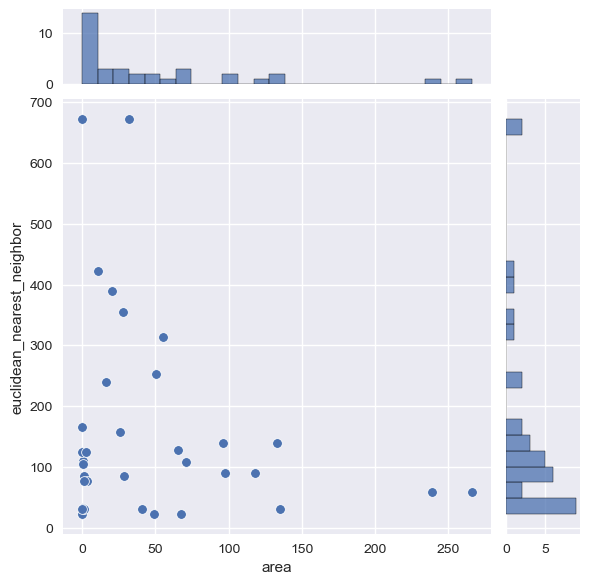

In [68]:
# jointplot muestra dos tipos de graficas al tiempo
sns.jointplot(
    data=metricas_parche_df[metricas_parche_df['class_val']==1], # conjunto de datos 
    x='area', # variable numerica para x, se pone el nombre de la columna del conjunto de datos
    y='euclidean_nearest_neighbor', # variable numerica para y, se pone el nombre de la columna del conjunto de datos
    marginal_ticks=True, # para agregarle ejes a las graficas de arriba y la derecha
    marginal_kws=dict(bins=25, # cambia numero de bins de las graficas de los lados
                      fill=True) # deja relleno de barras de histograma, si se pone False deja solo los bordes        
    )

# mostrar grafica
plt.show()

De acuerdo con los resultados de distancia euclidiana al vecino más cercano se tiene que, el parche de área natural más aislado se encuentra a 672,31 metros de un vecino de su misma categoría. La distancia mínima entre parches es de 22,36 metros y el valor medio de distancia es de 156,48. El histograma de frecuencias muestra que al menos 20 parches tienen un vecino cercano a una distancia aproximada de 100 metros (el largo de una calle estándar en la ciudad), lo que puede indicar agrupamiento de parches en algún sector del corregimiento y por tanto alta fragmentación en esa región de agrupamiento.

Respecto al tamaño de los parches de cobertura natural, se tiene el promedio es de 47,38 hectáreas, oscilando entre 0,01 y 266,08 hectáreas, con una desviación estándar de 47,38. Al menos 26 parches que corresponde con el 75%, tienen un área menor de 70 hectáreas. De acuerdo con los resultados de distancia al vecino más cercano se puede esperar que parches de tamaño menor a 50 hectáreas se encuentren a distancias menores a 150 metros, lo que significa alta fragmentación.

In [69]:
# se crea geodataframe con los poligonos categorizados como naturales
gdf_naturales = gdf_cob[gdf_cob['categ_cob']=='Natural'].copy()


In [70]:
# se obtienen datos generales de los campos del gdf creado con anterioridad
gdf_naturales.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 40 entries, 27 to 131
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   nivel_3          40 non-null     object  
 1   Area_ha          40 non-null     float64 
 2   area_km2         40 non-null     float64 
 3   cob_equivalente  40 non-null     object  
 4   geometry         40 non-null     geometry
 5   categ_cob        40 non-null     object  
 6   valor_clase      40 non-null     int64   
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 2.5+ KB


In [75]:
# se hace un dissolve por categoria de cobertura y sumando las areas en hectareas para unir poligonos de la misma categoria
gdf_naturales = gdf_naturales.dissolve(by='categ_cob',aggfunc={'Area_ha':'sum'})

# se hace explode para separar poligonos sin conexion espacial
gdf_naturales = gdf_naturales.explode(index_parts=True)

# se actualiza el area en hectareas
gdf_naturales['Area_ha'] = round(gdf_naturales.area/10000,4)

In [76]:
gdf_naturales.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 32 entries, ('Natural', 0) to ('Natural', 31)
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Area_ha   32 non-null     float64 
 1   geometry  32 non-null     geometry
dtypes: float64(1), geometry(1)
memory usage: 2.0+ KB


In [77]:
# se generan areas nucleo o area interna para poligonos naturales
gdf_area_nucleo_ini = gdf_naturales.geometry.buffer(-80)

# se convierte en geodataframe
gdf_area_nucleo_ini = gpd.GeoDataFrame(gdf_area_nucleo_ini, geometry=gdf_area_nucleo_ini.geometry)

# se eliminan los poligonos vacios
gdf_area_nucleo_ini = gdf_area_nucleo_ini[~gdf_area_nucleo_ini.is_empty]

# poligonos separados
gdf_area_nucleo_ini = gdf_area_nucleo_ini.explode(index_parts=True).reset_index()

# se dejan solo las columnas necesarias
gdf_area_nucleo_ini = gdf_area_nucleo_ini[['categ_cob','geometry']]

#se actualiza el area
gdf_area_nucleo_ini['Area_ha'] = round(gdf_area_nucleo_ini.area/10000,4)

In [78]:
gdf_area_nucleo_ini.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   categ_cob  44 non-null     object  
 1   geometry   44 non-null     geometry
 2   Area_ha    44 non-null     float64 
dtypes: float64(1), geometry(1), object(1)
memory usage: 1.2+ KB


In [79]:
gdf_naturales.to_file("./resultados.gpkg", layer='areas_naturales', driver="GPKG")
gdf_area_nucleo_ini.to_file("./resultados.gpkg", layer='areas_interna', driver="GPKG")

### **Definición de núcleos de conservación a conectar**

In [80]:
# condiciones para areas nucleo
condicion1 = gdf_naturales['Area_ha'] > 5
condicion2 = gdf_area_nucleo_ini['Area_ha']>1

# se seleccionan los poligonos que cumplen las condiciones
poli_gdf_naturales = gdf_naturales[condicion1].copy()
poli_gdf_naturales = poli_gdf_naturales.reset_index()

poli_gdf_interior = gdf_area_nucleo_ini[condicion2].copy()
poli_gdf_interior = gdf_area_nucleo_ini[condicion2].reset_index()


#seleccion por localizacion para elegir los que cumplen ambas condiciones
areas_nucleo_vf = poli_gdf_naturales.sjoin(poli_gdf_interior, how='inner')

# se hace un dissolve por categoria
areas_nucleo_vf =areas_nucleo_vf.dissolve(by='categ_cob_left')

# se crean poligonos separados espacialmente
areas_nucleo_vf = areas_nucleo_vf.explode(index_parts=True)

# se dejan solo la geometria y la categoria
areas_nucleo_vf = areas_nucleo_vf[['categ_cob_right','geometry']]

# se crea campo de area y se calcula
areas_nucleo_vf['Area_ha'] = round(areas_nucleo_vf.area/10000,4)

Inicialmente se identificaron 32 núcleos de conservación definidos como coberturas naturales de bosques fragmentado y rastrojo alto, cuyas áreas fluctuaron entre 0,035 y 235,941 ha. 
Una vez aplicados los criterios de priorización se obtuvieron 19 fragmentos que en conjunto suman 1586,27 ha, de las cuales 714,07 ha corresponden con áreas de interior y cuyos tamaños oscilaron entre 1,03 y 154,98 ha. 


In [81]:
areas_nucleo_vf.explore(
    tooltip='Area_ha', # muestra las proporciones de coberturas con el nombre del sector en el cajetin, cuando se pase el cursor
    popup=True, # muestra todos los valores de la columna con un clic sobre el polígono
    tiles="CartoDB positron", # usa cartodb positron de mapa base
    style_kwds=dict(color="black") # usa borde de polígono negro
)

### **Elaboración del mapa de fricción para el desplazamiento de las especies**

#### **Mapa de fricción: suma ponderada**

La ponderación de las variables definidas para la elaboración del mapa de fricción se muestra en la Tabla 4. Con base en esto, el mayor peso se les asignó a las áreas núcleos (50%), le sigue las coberturas de la tierra con (27%), la distancia a la red hídrica con 17% y finalmente la distancia a las vías le fue asignado un peso de 5%. 

![tabla](./img/resul_ponderacion_variables.png)


Con base en lo anterior, se calcula la superficie de fricción como sigue:

![figura](./img/mapa_friccion.png)

Una vez elaborado el mapa de fricción se constató que el corregimiento de Santa Elena presenta fricción media a alta para el desplazamiento de las especies, esto es contrario a lo encontrado por Colorado, et. al., lo cual indica que el corregimiento ha estado presentando una mayor de fragmentación.
Los sectores de vereda que presentan mayores restricciones para el desplazamiento de las especies son Piedras Blancas-Matasano y Las Palmas, con porcentajes de 14,32% y 13,38% de restricción alta, respectivamente. Estos sectores se encuentran localizados en el norte y suroccidente del corregimiento, lo que a su vez se asocia a pasto manejado, cultivo transitorio-pasto manejado y construcciones. 


### **Modelamiento de la red de conectividad ecológica**

Con base en el modelamiento de la red de conectividad ecológica se obtuvo que, en total se tienen 70 enlaces o corredores de 100 m de amplitud para conectar los núcleos priorizados. 
El tamaño de un corredor promedio es de 4,87 ha ± 10,92 ha. Por otro lado, teniendo en cuenta las coberturas por las cuales se trazaron los corredores se tiene que los bosques plantados representan el 47,76 % de la cobertura presente en los corredores propuestos, y en un porcentaje menor se encuentran los rastrojos naturales y el suelo desnudo con 0,28  y 1,92 %, respectivamente. 



![figura](./img/red_ecologica.png)

Los corredores ecológicos constituyen una herramienta valiosa para la conservación de la biodiversidad a escala de paisaje, lo que adquiere mayor relevancia en paisajes fragmentados en áreas urbanas y periurbanas en donde la intervención antrópica es marcada, y tanto los bosques y corredores naturales son limitados y se encuentran en una matriz modificada [1].
 
Este ejercicio de modelación a partir de análisis geoespacial y herramientas de Sistemas de Información Geográfica-SIG, permitió seleccionar 19 parches de bosques y rastrojo alto que estarían conectados por 70 corredores. 


La red de conectividad ecológica propuesta tiene resultados  distintos a los encontrados por Colorado, et. al., Esto se debe a la diferencia entre los núcleos de conservación definidos y las variables utilizadas, además, a que si bien el paisaje ecológico se encuentra fragmentado, existen parches de cobertura natural suficientemente grandes que permiten el trazado de más de una ruta de conexión con otros parches. 
 
Es importante mencionar que, los resultados obtenidos en esta investigación pueden ser mejorados con la inclusión de otras variables físicas como pendientes, densidad de drenaje, entre otras; en caso de requerir la definición de corredores específicamente para alguna especie, se hace necesario entonces la inclusión de datos de avistamiento de la misma, así como consulta bibliográfica que pueda ser de utilidad a la hora de determinar las posibles rutas de movilidad. 


## **Conclusiones**

En este estudio, se realizó una evaluación de la conectividad ecológica en Santa Elena, Antioquia, con el objetivo de comprender los patrones espaciales de fragmentación del paisaje. A partir del análisis de datos geoespaciales y técnicas de SIG, se obtuvieron los siguientes hallazgos y conclusiones clave:

1.	Se identificaron corredores ecológicos clave: Mediante el análisis de conectividad, se identificaron corredores ecológicos del corregimiento de Santa Elena. Estos corredores actúan como enlaces cruciales entre áreas naturales fragmentadas, permitiendo el flujo genético y el movimiento de especies, lo que contribuye a la viabilidad de las poblaciones y al mantenimiento de los procesos ecológicos.

2.	La fragmentación del paisaje es significativa: Se observó una alta fragmentación del paisaje en el corregimiento de Santa Elena, principalmente debido a la expansión urbana, la actividad agrícola y la infraestructura vial. Estos procesos han dado lugar a la pérdida y separación de hábitats naturales, lo que compromete la integridad ecológica y la funcionalidad de los ecosistemas.

3.	Importancia de la conservación y restauración de la conectividad: Los resultados resaltan la necesidad de implementar medidas de conservación y restauración que promuevan la conectividad ecológica en Santa Elena. Esto incluye la protección de los corredores identificados y la creación de nuevos enlaces para conectar áreas fragmentadas. Además, se deben considerar enfoques de restauración para rehabilitar áreas degradadas y mejorar la conectividad del paisaje.

4.	Consideraciones socioeconómicas y de gobernanza: La planificación e implementación de estrategias de conectividad ecológica debe tener en cuenta las consideraciones socioeconómicas y de gobernanza Enel corregimiento de de Santa Elena. Es fundamental involucrar a las comunidades locales, las autoridades ambientales y otros actores relevantes en la toma de decisiones, promoviendo la participación activa y el manejo sostenible de los recursos naturales.

5.	La importancia de la colaboración interdisciplinaria: La evaluación de la conectividad ecológica requiere una aproximación interdisciplinaria, integrando conocimientos científicos, técnicas de SIG, análisis geoespacial y la participación de expertos en ecología, planificación del paisaje y gestión ambiental. La colaboración entre diferentes disciplinas y la integración de datos y enfoques complementarios enriquecen la comprensión de la conectividad ecológica y respaldan la toma de decisiones informadas.

Los resultados y conclusiones obtenidos pueden servir como base para la formulación de políticas, la planificación territorial y la implementación de acciones concretas para mantener y restaurar los procesos ecológicos y la biodiversidad en la región.


## **Referencias**

* Alcaldía de Medellín. Propuesta de gestión integral de la biodiversidad y los servicios ecosistémicos para Medellín. Síntesis del documento técnico de soporte; 2014. 242 p.
* Britto, G. (2021). Análisis de métricas de paisaje en el departamento del Amazonas entre los años 2002-2018. Universidad Antonio Nariño. Bogotá. pp 1-46
* Colorado, Z, Vásquez J & Mazo I. (2017). Modelo de conectividad ecológica de fragmentos de bosque andino en Santa Elena (Medellín, Colombia). Acta biológica colombiana, 22 (3), 379-393.
* Grupo HTM-Municipio de Medellín. Plan Especial de Ordenamiento Corregimental de Santa Elena. Fase Diagnóstica. Tomos I-IV. Sin publicar
* Kattan GH. Fragmentación: patrones y mecanismos de extinción de especies. En: Ecología y conservación de Bosques Neotropicales. Guariguata MR, Katan GH, editores. EULAC/GTZ. Primera edición. Ediciones UR. Cartago, CR; 2002. p. 561-590.
* Monedero , C., & Gutiérrez, M. (2001). Análisis cuantitativo de los patrones espaciales de la cobertura vegetal en el geosistemamontañoso tropical El Ávila. ECOTROPICOS 14, 19-30.
* Saaty, T. (1980, November). The analytic hierarchy process (AHP) for decision making. In Kobe, Japan (Vol. 1, p. 69).
* Wu, Q., (2020). geemap: A Python package for interactive mapping with Google Earth Engine. The Journal of Open Source Software, 5(51), 2305. https://doi.org/10.21105/joss.02305